# How to use the standard error function of benchmark functions

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenJij/OpenJijTutorial/blob/master/source/en/002-Evaluation_errorbar.ipynb)

This section explains how to use the standard error function added to the benchmark function.

## Install Libraries and model preparation

We can branch an additional feature/error_bar repository into own repository, which we forked from OpenJij's repository.

Antiferomagnetic one-dimensional Ising model preparation, 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import openjij as oj

# set antiferomagnetic one-dimensional Ising model
N = 30
h = {0: -10}
J = {(i, i+1): 1 for i in range(N-1)}

## Benchmark function

The usage is the same as before.

Auguments are unchanged.
The following calculations are now stored in a new dictionary type as the return value.

- se_success_prob: a list of standard errors for success probability  
      standard deviation of the expected value of success probability when we anneal `iteration` times.
      the values are stored for each `step_num`

- se_residual_energy: a list of standard errors for residual energy  
      standard deviation of the average value of residual energy when we anneal `iteration` times.
      the values are stored for each `step_num`

- se_lower_tts: a list of lower errors in TTS
      The lower error of TTS computed based on the upper error of success probability
      
- se_upper_tts: a list of upper errors in TTS
      The upper error of TTS computed based on the lower error of success probability

In [2]:
# set optimal solution
correct_state = [(-1)**i for i in range(N)]

# set step_num and iteration
step_num_list = list(range(10, 101, 10))  # [10, 20,,,, 100]
iteration = 100

# compute TTS, residual energy, success probability, specimen average & standard error
sampler = oj.SASampler(num_reads=iteration)
result = oj.solver_benchmark(
                      solver=lambda time, **args: sampler.sample_ising(h,J,num_sweeps=time), 
                      time_list=step_num_list, solutions=[correct_state], p_r=0.99
            )

In [3]:
# option: seaborn is good at visualization
# !pip install seaborn
import seaborn as sns
sns.set()

### TTS, residual energy and success probability

We can visulalize TTS, residual energy, success probability as before.

Text(0, 0.5, 'Success probability')

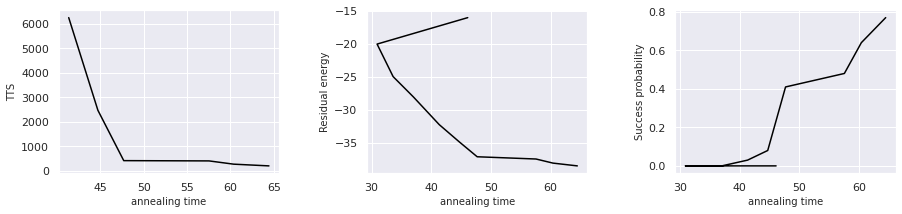

In [6]:
fig, (axL,axC,axR) = plt.subplots(ncols=3, figsize=(15,3))
plt.subplots_adjust(wspace=0.4)

fontsize = 10
axL.plot(result['time'], result['tts'], color = 'black')
axL.set_xlabel('annealing time', fontsize=fontsize)
axL.set_ylabel('TTS', fontsize=fontsize)

axC.plot(result['time'], result['residual_energy'], color = 'black')
axC.set_xlabel('annealing time', fontsize=fontsize)
axC.set_ylabel('Residual energy', fontsize=fontsize)

axR.plot(result['time'], result['success_prob'], color = 'black')
axR.set_xlabel('annealing time', fontsize=fontsize)
axR.set_ylabel('Success probability', fontsize=fontsize)

### Standard error

The value of standard error is stored in `se_success_prob` & `se_residual_energy`.
These allow us to display standard error bars.

In [7]:
# check for standard errors
print(result['se_upper_tts'])
print(result['se_lower_tts'])
print(result['se_residual_energy'])
print(result['se_success_prob'])

[inf, inf, inf, inf, 7695.650221419744, 3644.8655556701647, 3208.0260160559314, 14055.445317726388, 1322.6002725331891, 489.1079299082817]
[inf, inf, inf, inf, 5398.579224570907, 1993.1589254329997, 321.5840555508159, 337.1023745696516, 272.15911680620405, 201.95995978525684]
[4.869986414433583, 4.426686746942408, 3.9944911560747753, 3.4523597551222673, 3.5046866169214455, 2.512112073675669, 2.0192007619777974, 1.906925178491185, 1.4905764595679691, 1.1399096189584241]
[0.0, 0.0, 0.0, 0.0, 0.17058722109231983, 0.2712931993250107, 0.49183330509431744, 0.4995998398718718, 0.48, 0.4208325082500163]


Text(0, 0.5, 'Success probability')

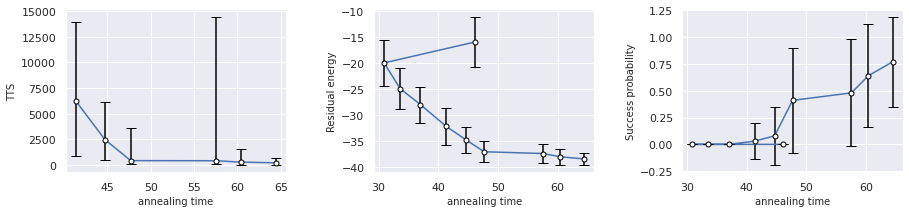

In [8]:
# visualization
fig, (axL,axC,axR) = plt.subplots(ncols=3, figsize=(15,3))
plt.subplots_adjust(wspace=0.4)

fontsize = 10
axL.plot(result['time'], result['tts'])
axL.errorbar(result['time'], result['tts'], yerr = (result['se_lower_tts'],result['se_upper_tts']), capsize=5, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
axL.set_xlabel('annealing time', fontsize=fontsize)
axL.set_ylabel('TTS', fontsize=fontsize)

axC.plot(result['time'], result['residual_energy'])
axC.errorbar(result['time'], result['residual_energy'], yerr = result['se_residual_energy'], capsize=5, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
axC.set_xlabel('annealing time', fontsize=fontsize)
axC.set_ylabel('Residual energy', fontsize=fontsize)

axR.plot(result['time'], result['success_prob'])
axR.errorbar(result['time'], result['success_prob'], yerr = result['se_success_prob'], capsize=5, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
axR.set_xlabel('annealing time', fontsize=fontsize)
axR.set_ylabel('Success probability', fontsize=fontsize)

As annealing time per session increased, error bars of the standard errors for success probability and residual energy become shorter and shorter.